# LeNet

![title](./images/lenet.png)

## 加载数据

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./MNIST_data", one_hot=True)

X_train, Y_train = mnist.train.images, mnist.train.labels
X_validation, Y_validation = mnist.validation.images, mnist.validation.labels
X_test, Y_test = mnist.test.images, mnist.test.labels

print("Image size: {}".format(X_train[0].shape))
print("Training set: {}".format(X_train.shape))
print("Validation set: {}".format(X_validation.shape))
print("Testing set: {}".format(X_test.shape))

/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Image size: (784,)
Training set: (55000, 784)
Validation set: (5000, 784)
Testing set: (10000, 784)


## 可视化数据

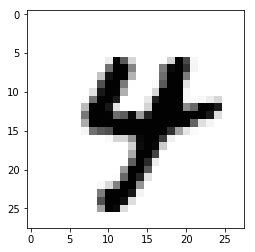

In [2]:
import random
import matplotlib.pyplot as plt
tf.set_random_seed(2018)

index = random.randint(0, mnist.train.num_examples)
plt.imshow(mnist.train.images[index].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()

### 各层参数详解

### 输入层

输入图像尺寸首先归一化到 32x32x1

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 784])
X_img = tf.reshape(X, shape=[-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, shape=[None, 10])

In [4]:
X_img = tf.pad(X_img, [[0, 0], [2, 2], [2, 2], [0, 0]])
X_img.get_shape()

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(1)])

### 第一层：卷积层

这一层的输入图像像素是32x32x1，卷积核尺大小为5x5，个数为6，步长为1，输出特征图大小为28x28x6. 

In [5]:
with tf.name_scope("conv1"):
    W1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 6], mean=0.0, stddev=0.1))
    W1_hist = tf.summary.histogram("W1", W1)
    b1 = tf.Variable(tf.zeros([6]))
    b1_hist = tf.summary.histogram("b1", b1)
    conv1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="VALID")
    conv1 = tf.nn.bias_add(conv1, b1)
    conv1 = tf.nn.relu(conv1)
    conv1_hist = tf.summary.histogram("conv1", conv1)
    print(conv1.shape)

(?, 28, 28, 6)


### 池化层

这层的输入时上一层的输出，尺寸为(?, 28, 28, 6),本层采用卷积核大小为2x2，步长为2，所以本层的输出为(?, 14, 14, 6)

In [6]:
with tf.name_scope("pool1"):
    pool_1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    print(pool_1.shape)

(?, 14, 14, 6)


### 第二层：卷积层

本层的输入尺寸为(?, 14, 14, 6),使用卷积核大小为5x5，个数为16，不使用全0填充，步长为1，输出尺寸为(?, 10, 10, 16)

In [7]:
with tf.name_scope("conv2"):
    W2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=0.0, stddev=0.1))
    W2_hist = tf.summary.histogram("W2", W2)
    b2 = tf.Variable(tf.zeros([16]))
    b2_hist = tf.summary.histogram("b2", b2)
    conv2 = tf.nn.conv2d(pool_1, W2, strides=[1, 1, 1, 1], padding="VALID")
    conv2 = tf.nn.bias_add(conv2, b2)
    conv2 = tf.nn.relu(conv2)
    conv2_hist = tf.summary.histogram("conv2", conv2)
    print(conv2.shape)

(?, 10, 10, 16)


### 池化层

本层输入尺寸大小为(?, 10, 10, 16)，使用卷积核大小为2x2，步长为2，输出尺寸为(?, 5, 5, 16)

In [8]:
with tf.name_scope("pool2"):
    pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    print(pool_2.shape)

(?, 5, 5, 16)


### 第三层：全连接层

本层输入为矩阵大小为(?, 5, 5, 16),输出节点数为120个

In [9]:
with tf.name_scope("fc1"):
    flatten = tf.reshape(pool_2, shape=[-1, 5*5*16])
    W3 = tf.Variable(tf.truncated_normal(shape=[5*5*16, 120], mean=0.0, stddev=0.1))
    W3_hist = tf.summary.histogram("W3", W3)
    b3 = tf.Variable(tf.zeros([120]))
    b3_hist = tf.summary.histogram("b3", b3)
    fc1 = tf.matmul(flatten, W3) + b3
    fc1 = tf.nn.relu(fc1)
    fc1_hist = tf.summary.histogram("fc1", fc1)
    print(fc1.shape)

(?, 120)


### 第四层：全连接层

本层输入尺寸为(?, 120)，输出节点数为84个

In [10]:
with tf.name_scope("fc2"):
    W4 = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=0.0, stddev=0.1))
    W4_hist = tf.summary.histogram("W4", W4)
    b4 = tf.Variable(tf.zeros([84]))
    b4_hist = tf.summary.histogram("b4", b4)
    fc2 = tf.matmul(fc1, W4) + b4
    fc2 = tf.nn.relu(fc2)
    fc2_hist = tf.summary.histogram("fc2", fc2)
    print(fc2.shape)

(?, 84)


### 第五层：全连接层

本层的输入尺寸为(?, 84)， 输出节点数为10

In [11]:
with tf.name_scope("fc3"):
    W5 = tf.Variable(tf.truncated_normal(shape=[84, 10], mean=0.0, stddev=0.1))
    W5_hist = tf.summary.histogram("W5", W5)
    b5 = tf.Variable(tf.zeros([10]))
    b5_hist = tf.summary.histogram("b5", b5)
    logits = tf.matmul(fc2, W5) + b5
    print(logits.shape)

(?, 10)


In [12]:
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_correction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correction, tf.float32))
acc_summ = tf.summary.scalar("accuracy", accuracy)

saver = tf.train.Saver()

summary = tf.summary.merge_all()

### 模型评估

### 训练模型

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./log")
    writer.add_graph(sess.graph)
    
    print("Learning Started...")
    for epoch in range(2):
        avg_acc = 0
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / 128)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(128)
            feed_dict = {X: batch_x, Y: batch_y}
            _, s, a, c = sess.run([optimizer, summary, accuracy, cost], feed_dict=feed_dict)
            writer.add_summary(s, global_step=i)
            avg_acc += a / total_batch
            avg_cost += c / total_batch
            
        print("Epoch: {}\tLoss: {:.9f}\tAccuracy: {:.2%}".format(epoch+1, avg_cost, avg_acc))
    print("Training finished!")
    
    saver.save(sess, "checkpoint/lenet.ckpt")
    print("Model saved!")

Learning Started...
Epoch: 1	Loss: 0.328435354	Accuracy: 90.34%
Epoch: 2	Loss: 0.088047973	Accuracy: 97.32%
Training finished!
Model saved!


## 评估模型

In [14]:
with tf.Session() as sess:
    model_file = tf.train.latest_checkpoint("checkpoint")
    saver.restore(sess, model_file)
    test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: Y_test})
    print("Accuracy on test set:{:.3%}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from checkpoint/lenet.ckpt
Accuracy on test set:97.630%
